#1. Function

In [2]:
stationfares = [
    {"station": "청량리", "fare": 1500},
    {"station": "성북", "fare": 1800},
    {"station": "의정부", "fare": 2000},
    {"station": "소요산", "fare": 2500}
]

In [3]:
stations = []
fares = []
for stationfare in stationfares:
  stations.append(stationfare["station"])
  fares.append(stationfare["fare"])
print(stations)
print(fares)

['청량리', '성북', '의정부', '소요산']
[1500, 1800, 2000, 2500]


In [4]:
len(stationfares)

4

In [5]:
max(fares)

2500

In [6]:
min(fares)

1500

In [7]:
sum(fares)

7800

In [8]:
for idx, station in enumerate(stations):
  print(idx, station)

0 청량리
1 성북
2 의정부
3 소요산


In [9]:
sum = lambda a, b : a+b
sum(2,3)

5

In [10]:
def getFare(station):
  for stationfare in stationfares:
    if stationfare["station"] == station:
      return stationfare["fare"]
fare = getFare("청량리")
print(fare)

1500


In [11]:
for station in stations:
  print(station, getFare(station))

청량리 1500
성북 1800
의정부 2000
소요산 2500


#2. Class

In [12]:
class Comments:
  title = "#### %s 승차권 판매기입니다. ####"
  product_description = "%s:%s(%s원)"
  insert_fare = "\n요금을 넣어주세요. :"
  insufficient_fare = "%s 요금이 부족합니다. 거스름돈은 %s원 입니다."
  select_station = "원하시는 역번호를 선택하세요."
  select_error = "잘못 입력하셨습니다."
  finish_sale = "선택하신 %s 입니다. 거스름돈은 %s원 입니다.\n감사합니다."
  terminate_sale = "승차권 판매를 종료합니다."

In [13]:
class Products:
  productNames = []
  productValues = []

In [14]:
class SubwayTicket(Products):
  _data = stationfares
  _name = "지하철"
  _status = True

  def __init__(self):
    print(Comments.title %self._name)

  def set_products(self):
    Products.productNames = []
    Products.productValues = []
    for stationfare in self._data:
      Products.productNames.append(stationfare["station"])
      Products.productValues.append(stationfare["fare"])

  def run(self):
    self.set_products()
    while self._status:
      try:
        inputMoney = int(input(Comments.insert_fare))
      except ValueError:
        print(Comments.select_error)
      else:
        self.selectStation(inputMoney)

  def selectStation(self, money):
    print(Comments.select_station)
    for idx, name in enumerate(Products.productNames):
      fare = Products.productValues[idx]
      print(Comments.product_description %(str(idx), name, fare))
    inputStation = int(input(Comments.select_station))
    self.payment(money, inputStation)

  def payment(self, money, idx):
    name = Products.productNames[idx]
    fare = Products.productValues[idx]
    if money >= fare:
      balance = money - fare
      print(Comments.finish_sale %(name, str(balance)))
    else:
      print(Comments.insufficient_fare %(name, str(money)))


In [15]:
tm = SubwayTicket()

try:
  tm.run()
except KeyboardInterrupt:
  tm._status = False
  print(Comments.terminate_sale)

#### 지하철 승차권 판매기입니다. ####
승차권 판매를 종료합니다.


#3. Inheritance

In [16]:
railstationfares = [
                    {"station": "천안", "fare": 15000},
                    {"station": "대전", "fare": 20000},
                    {"station": "동대구", "fare": 37000},
                    {"station": "부산", "fare": 53000},
]

In [17]:
class RailTicket(SubwayTicket):
  _data = railstationfares
  _name = "고속철도"

In [ ]:
tm = RailTicket()

try:
  tm.run()
except KeyboardInterrupt:
  tm._status = False
  print(Comments.terminate_sale)

#### 고속철도 승차권 판매기입니다. ####
승차권 판매를 종료합니다.


#4. Graph

In [18]:
import matplotlib.pyplot as plt
plt.style.use('classic')

<BarContainer object of 4 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_

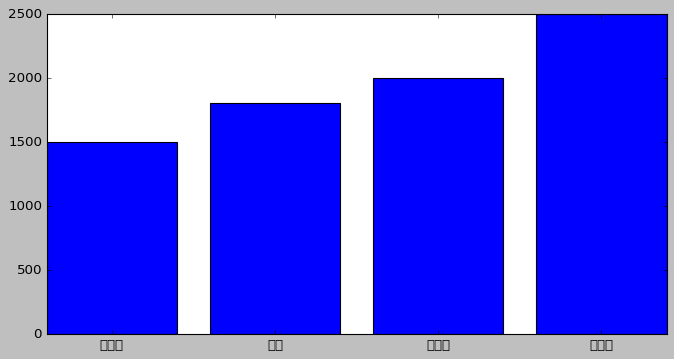

In [19]:
names = Products.productNames
values = Products.productValues
plt.figure(figsize=(10,5))
plt.bar(names, values)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,972 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

런타임 - 런타임 다시 시작
matplotlib의 폰트를 Nanum 폰트로 지정

In [ ]:
plt.rc('font', family='NanumBarunGothic')

<BarContainer object of 4 artists>

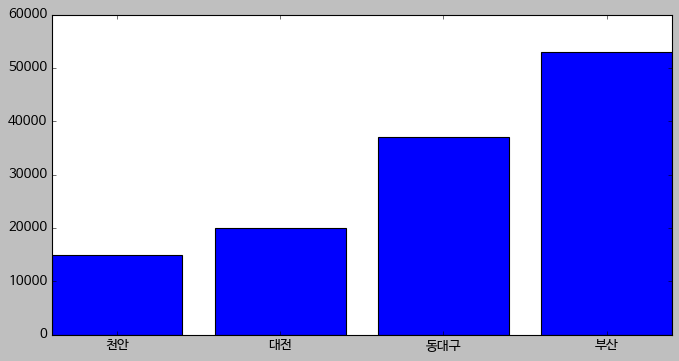

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(names, values)

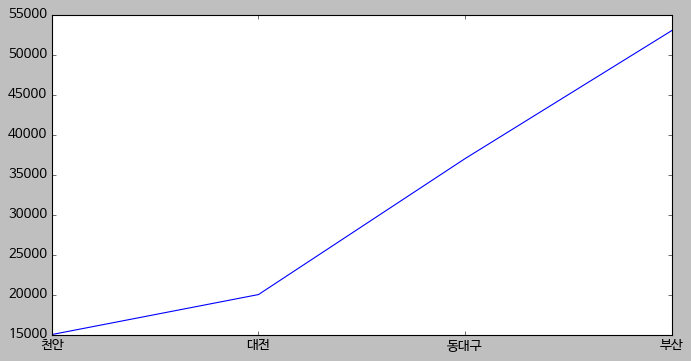

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(names, values)

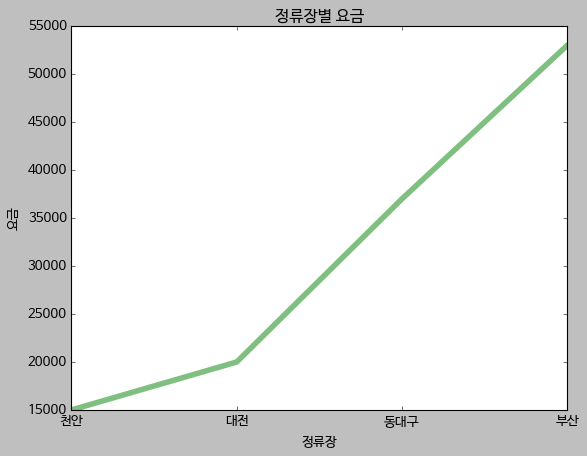

In [ ]:
plt.xlabel("정류장")
plt.ylabel("요금")
plt.title("정류장별 요금")
plt.plot(names, values, linewidth=5.0, alpha=0.5, color='green')